# Decision Trees and Random Forests in Python


**Learning Objectives**


1. Explore and analyze data using a Pairplot
2. Train a single Decision Tree
3. Predict and evaluate the Decision Tree
4. Compare the Decision Tree model to a Random Forest


## Introduction 

In this lab, you explore and analyze data using a Pairplot, train a single Decision Tree, predict and evaluate the Decision Tree, and compare the Decision Tree model to a Random Forest.  Recall that the [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving both regression and classification problems too.  Simply, the goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

 Each learning objective will correspond to a _#TODO_ in this student lab notebook -- try to complete this notebook first and then review the [solution notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/launching_into_ml/solutions/decision_trees_and_random_Forests_in_Python.ipynb)

In [1]:
!pip install scikit-learn==0.22.2

     |████████████████████████████████| 7.1 MB 7.0 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


**Restart** the kernel before proceeding further (On the Notebook menu, select Kernel > Restart Kernel > Restart).


## Load necessary libraries 
We will start by importing the necessary libraries for this lab.

In [1]:
# Importing necessary tensorflow library and printing the TF version.
import tensorflow as tf

print("TensorFlow version: ",tf.version.VERSION)


TensorFlow version:  2.6.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [3]:
# Reading "kyphosis.csv" file using the read_csv() function included in the pandas library
df = pd.read_csv('../kyphosis.csv')

In [4]:
df.head()

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15


## Exploratory Data Analysis

**Lab Task #1:** Check a pairplot for this small dataset.

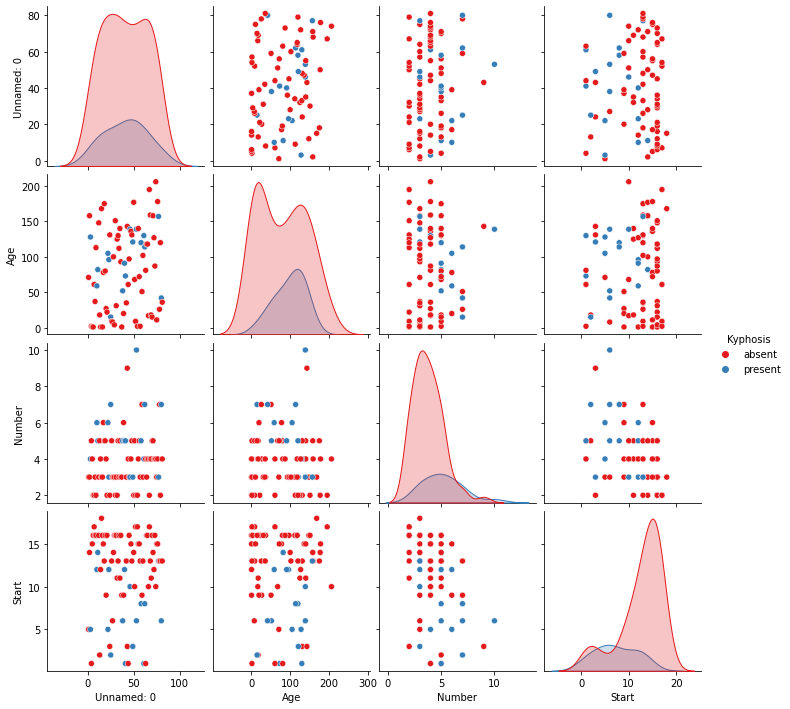

In [5]:
# Use the pairplot() function to plot multiple pairwise bivariate distributions in a dataset
# TODO 1
sns.pairplot(df,hue='Kyphosis',palette='Set1')


## Train Test Split

Let's split up the data into a training set and a test set!

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

**Lab Task #2:** Train a single decision tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
# Train Decision Tree Classifer
# TODO 2
dtree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation

**Lab Task #3:** Evaluate our decision tree.

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
# build a text report showing the main classification metrics
# TODO 3a
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.33      0.25      0.29         4

    accuracy                           0.80        25
   macro avg       0.60      0.58      0.58        25
weighted avg       0.78      0.80      0.79        25



In [15]:
# compute confusion matrix to evaluate the accuracy of a classification
# TODO 3b
print(confusion_matrix(y_test,predictions))


[[19  2]
 [ 3  1]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Kyphosis', 'Age', 'Number', 'Start']

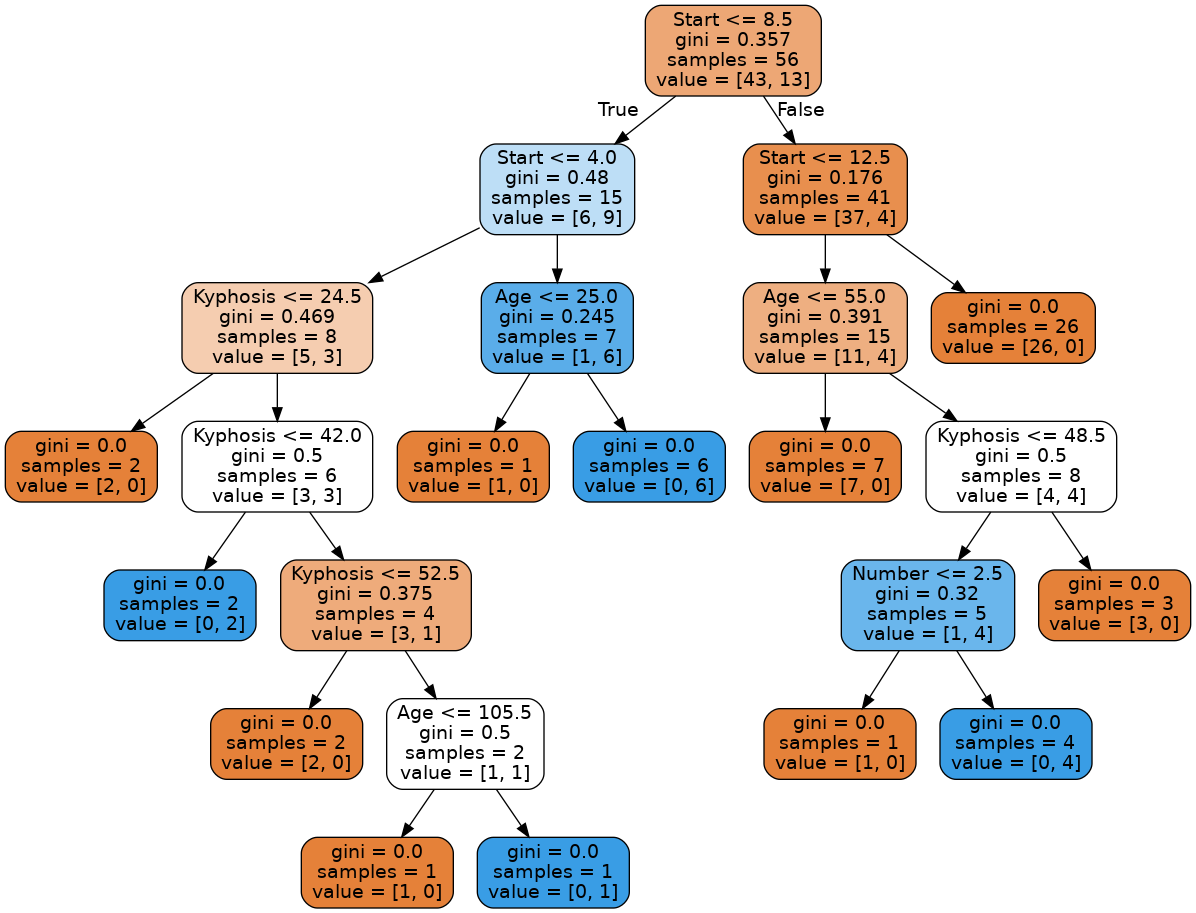

In [17]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

**Lab Task #4:** Compare the decision tree model to a random forest.

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
# compute confusion matrix to evaluate the accuracy
# TODO 4a
print(confusion_matrix(y_test,rfc_pred))


[[20  1]
 [ 3  1]]


In [21]:
# build a text report showing the main metrics
# TODO 4b
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



Copyright 2021 Google Inc.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.